In [15]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors

# Import MODIS Chloropyll Data

In [16]:
# Load the MODIS data

file_name = 'AQUA_MODIS.20190101.L3m.DAY.OC.1km.nc'
data = xr.open_dataset(file_name)
data

<xarray.Dataset>
Dimensions:  (lat: 17280, lon: 34560, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 89.99 89.98 89.97 89.96 ... -89.97 -89.98 -89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/60)
    product_name:                     AQUA_MODIS.20190101.L3m.DAY.OC.1km.nc
    instrument:                       MODIS
    title:                            MODISA Level-3 Equidistant Cylindrical ...
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   day
    ...                               ...
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    proj4_string:                     +proj=eqc +lat_ts=0 +lat_0=0 +x_0=0 +y_...
    data_bins:                        23577128
    data_minimum:                     0.007472789
    data_maximum:                     99.09871

In [17]:
# Print variable names

list(data.keys())

['chlor_a', 'palette']

# Know Our Variable: chlor_a

In [18]:
# Store chlorphyll variable

chl = data.chlor_a
chl

<xarray.DataArray 'chlor_a' (lat: 17280, lon: 34560)>
[597196800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.99 89.98 89.97 89.96 ... -89.97 -89.98 -89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

# Set Boundaries

In [19]:
# Set the spatial extent to cover the area of interest

min_lon, max_lon = -140, -95
min_lat, max_lat = 0, 45

extent = [min_lon, max_lon, min_lat, max_lat]

In [20]:
# Mask and clip of the chlrophyll data

mask_lon = (chl.lon >= min_lon) & (chl.lon <= max_lon)
mask_lat = (chl.lat >= min_lat) & (chl.lat <= max_lat)

chl = chl.where(mask_lon & mask_lat, drop=True)

In [21]:
# Check filtered variable 

chl

<xarray.DataArray 'chlor_a' (lat: 4320, lon: 4320)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 44.99 44.98 44.97 44.96 ... 0.02604 0.01562 0.005206
  * lon      (lon) float32 -140.0 -140.0 -140.0 -140.0 ... -95.03 -95.02 -95.01
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

In [22]:
# Store chlorophyll variables for plotting

chl_lat = chl.lat.values
chl_lon = chl.lon.values
chl_vals = chl.values

# Import SeaFlow Data V1

In [23]:
# Load the SeaFlow phytoplankton data into a Pandas DataFrame

file_name = "SeaFlow_cmap_v1.3_2020-08-21.csv"
seaflow = pd.read_csv(file_name)

seaflow.head()

,time,lat,lon,depth,cruise,abundance_prochloro,abundance_synecho,abundance_picoeuk,abundance_croco,diam_prochloro,...,diam_picoeuk,diam_croco,Qc_prochloro,Qc_synecho,Qc_picoeuk,Qc_croco,biomass_prochloro,biomass_synecho,biomass_picoeuk,biomass_croco
0,2013-03-26T23:55:07+00:00,-37.3706,-48.5224,5,KN210-04,156.423385,8.700647,2.444027,0.022526,0.607056,...,1.873219,4.479342,0.041277,0.172502,0.755547,7.304505,6.456759,1.500876,1.846578,0.164538
1,2013-03-27T00:00:21+00:00,-37.3740,-48.5005,5,KN210-04,167.126830,9.925778,2.522867,0.022526,0.599885,...,1.989879,3.179379,0.040031,0.174267,0.882991,2.959107,6.690280,1.729734,2.227668,0.066656
2,2013-03-27T00:27:23+00:00,-37.3884,-48.3881,5,KN210-04,168.492406,13.603690,3.880034,0.005631,0.610163,...,1.727717,2.572346,0.041824,0.175604,0.613283,1.712512,7.047093,2.388862,2.379559,0.009644
3,2013-03-27T04:57:45+00:00,-37.5802,-47.3620,5,KN210-04,137.715055,21.977787,3.429522,0.011263,0.588321,...,1.601986,5.492170,0.038070,0.138281,0.504663,13.462060,5.242866,3.039112,1.730752,0.151620
4,2013-03-27T05:00:46+00:00,-37.5829,-47.3505,5,KN210-04,136.805003,21.398941,3.435153,0.022526,0.589816,...,1.571785,3.306376,0.038320,0.143537,0.480481,3.291101,5.242409,3.071536,1.650524,0.074134


In [24]:
# Mask and clip of the seaflow data and drop null values for plotting

mask_lon = (seaflow.lon >= min_lon) & (seaflow.lon <= max_lon)
mask_lat = (seaflow.lat >= min_lat) & (seaflow.lat <= max_lat)

seaflow = seaflow.where(mask_lon & mask_lat).dropna(subset=['lat', 'lon'])

seaflow.head()

,time,lat,lon,depth,cruise,abundance_prochloro,abundance_synecho,abundance_picoeuk,abundance_croco,diam_prochloro,...,diam_picoeuk,diam_croco,Qc_prochloro,Qc_synecho,Qc_picoeuk,Qc_croco,biomass_prochloro,biomass_synecho,biomass_picoeuk,biomass_croco
61737,2011-09-30T18:22:11+00:00,36.797613,-121.846333,5.0,CN11ID,77.636453,96.740311,125.047855,NaN,0.577676,...,1.441038,NaN,0.036318,0.105561,0.384029,NaN,2.819638,10.211976,48.022012,NaN
61738,2011-09-30T23:07:42+00:00,36.728647,-122.039333,5.0,CN11ID,26.132785,123.608231,167.009136,NaN,0.583071,...,1.732658,NaN,0.037200,0.132822,0.617821,NaN,0.972135,16.417911,103.181769,NaN
61739,2011-09-30T23:10:42+00:00,36.727315,-122.042500,5.0,CN11ID,23.452051,119.766322,157.747905,NaN,0.601648,...,1.762906,NaN,0.040335,0.135791,0.646033,NaN,0.945944,16.263194,101.910311,NaN
61740,2011-09-30T23:16:42+00:00,36.728892,-122.046167,5.0,CN11ID,26.987745,127.086313,166.817992,NaN,0.566587,...,1.765474,NaN,0.034547,0.136461,0.648460,NaN,0.932345,17.342319,108.174834,NaN
61741,2011-09-30T23:19:43+00:00,36.730667,-122.037333,5.0,CN11ID,21.427725,116.382300,147.293436,NaN,0.603698,...,1.807599,NaN,0.040691,0.138152,0.689138,NaN,0.871911,16.078485,101.505486,NaN


In [25]:
# Store the phytoplankton coordinates for plotting locations

seaflow_lon = seaflow.lon
seaflow_lat = seaflow.lat

# Plot the Data

In [26]:
# Create a function to determine the format of labels on color bar
def myfmt(x, pos):
    return '{0:.2f}'.format(x)

In [27]:
# Set min and max values for chlorophyll concentrations
chl_min, chl_max = 0.02, 2

# Set ticks for colorbar
chl_ticks = [0.02, 0.2, 2]

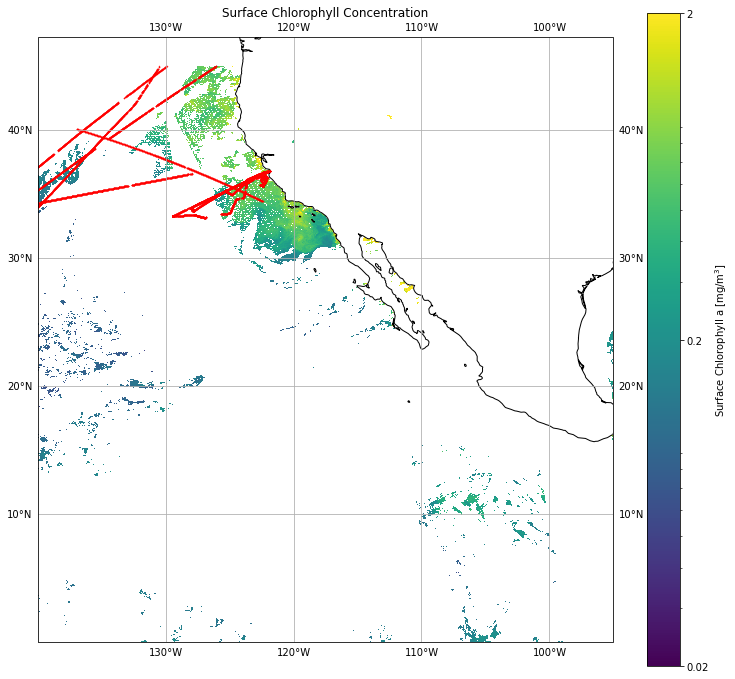

In [28]:
# Plotting the data. fig will be all the image, ax will be the plotted area. setting up platecarree projection
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})


# Plotting the sattelite image using pcolormesh and normalizing the data
chl_cmesh = plt.pcolormesh(chl_lon, chl_lat, chl_vals,
                           norm=colors.LogNorm(vmin=chl_min, vmax=chl_max), 
                           cmap='viridis')

# Adiding colorbar
cbar = plt.colorbar(chl_cmesh, fraction=0.09,
                    format=ticker.FuncFormatter(myfmt), ticks=chl_ticks)
cbar.set_ticklabels(chl_ticks)
cbar.set_label(r'Surface Chlorophyll a [mg/m$^3$]')

# Cropping image and adding coastlines, gridlines
ax.set_extent(extent)
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add titles and axis labels to plot
plt.title("Surface Chlorophyll Concentration")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Overlay Seaflow phytoplankton locations on top
plt.scatter(seaflow_lon, seaflow_lat, c='red', marker='o', s=0.2)

# Save and show the image (Saving directory will be the same as project directory)
plt.savefig('result.png')
plt.show()